In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
X = np.array([10,20,30,40,50])
y = np.array([2,6,2,10,7])

In [ ]:
X

array([10, 20, 30, 40, 50])

In [ ]:
y

array([ 2,  6,  2, 10,  7])

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X.reshape(-1, 1),y)

LinearRegression()

In [ ]:
model.intercept_

1.1999999999999993

In [ ]:
model.coef_

array([0.14])

In [ ]:
model.predict([[50]])

array([8.2])

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
# ypred = mx + c
ypred = 0.14 * X + 1.2

In [ ]:
mean_squared_error(y,ypred)

5.52

In [ ]:
# fig = px.scatter(X,y, width = 700, height = 500)
# fig.show()

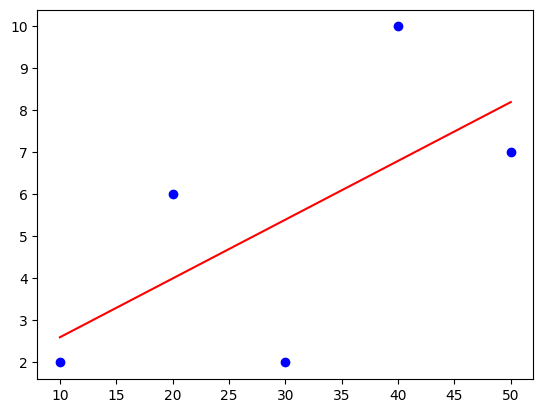

In [ ]:
plt.scatter(X,y,color="b")
plt.plot(X,ypred,color="r")
plt.show()

In [ ]:
#Multiple linear regression

In [ ]:
X = np.array([[10,0,4],
              [20,2,7],
              [30,3,5],
              [40,4,5],
              [50,5,2]])

y = np.array([2,6,2,10,7])

In [ ]:
X.shape

(5, 3)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.intercept_

-34.26666666666671

In [ ]:
model.coef_

array([  2.16      , -15.        ,   3.66666667])

In [ ]:
X[:,0]

array([10, 20, 30, 40, 50])

In [ ]:
ypred = 2.16 * X[:,0] - 15 * X[:,1] + 3.6667 * X[:,2] - 34.27

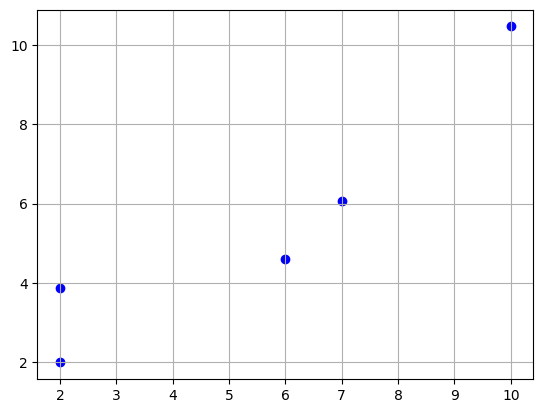

In [ ]:
plt.scatter(y,ypred,color="b")
plt.grid()
plt.show()

In [ ]:
mean_squared_error(y,ypred)

1.3066767820000105

In [ ]:
model.predict([[30,3,5]])

array([3.86666667])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# create matrix and vectors
X = np.array([[10,0,4],
              [20,2,7],
              [30,3,5],
              [40,4,5],
              [50,5,2]])

y = np.array([2,6,2,10,7])

lg = LinearRegression()
poly = PolynomialFeatures(degree = 2)

In [ ]:
x_=poly.fit_transform(X)
print("x before transformation: ", X)
print("x after transformation: ", x_)

x before transformation:  [[10  0  4]
 [20  2  7]
 [30  3  5]
 [40  4  5]
 [50  5  2]]
x after transformation:  [[1.0e+00 1.0e+01 0.0e+00 4.0e+00 1.0e+02 0.0e+00 4.0e+01 0.0e+00 0.0e+00
  1.6e+01]
 [1.0e+00 2.0e+01 2.0e+00 7.0e+00 4.0e+02 4.0e+01 1.4e+02 4.0e+00 1.4e+01
  4.9e+01]
 [1.0e+00 3.0e+01 3.0e+00 5.0e+00 9.0e+02 9.0e+01 1.5e+02 9.0e+00 1.5e+01
  2.5e+01]
 [1.0e+00 4.0e+01 4.0e+00 5.0e+00 1.6e+03 1.6e+02 2.0e+02 1.6e+01 2.0e+01
  2.5e+01]
 [1.0e+00 5.0e+01 5.0e+00 2.0e+00 2.5e+03 2.5e+02 1.0e+02 2.5e+01 1.0e+01
  4.0e+00]]


In [ ]:
lg.fit(x_, y)

LinearRegression()

In [ ]:
x_test=[[0.49, 0.18,0.2]]
x_test_=poly.transform(x_test)
x_test_

array([[1.    , 0.49  , 0.18  , 0.2   , 0.2401, 0.0882, 0.098 , 0.0324,
        0.036 , 0.04  ]])

In [ ]:
lg.predict(x_test_)

array([-8.99173647])

In [ ]:
ypred = lg.predict(x_)

In [ ]:
# mean_squared_error(y,ypred)

In [ ]:
lg.coef_

array([ 8.64109131e-15, -6.48128687e-01, -1.41084173e-01,  2.99739551e-02,
        9.28064557e-02, -7.53432395e-01,  8.81375933e-02, -7.53432395e-02,
       -2.96271457e-01,  2.60736559e-01])

In [ ]:
lg.intercept_

-8.61654320230811

#Machine Learning


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:

df = pd.read_csv('/content/Loan_prediction_dataset.csv')

In [ ]:
df.head(3)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   
2  LP001005   Male     Yes          0  Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y

In [ ]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
df['turn_over'] = df['LoanAmount'] / df['ApplicantIncome']

In [ ]:
df['loan_amount_day'] = df['Loan_Amount_Term'] / 365

In [ ]:
df['applicant_difference'] = df['ApplicantIncome'] - df['CoapplicantIncome']

In [ ]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History   turn_over  loan_amount_day  applicant_difference  
count      564.000000  592.000000       600.000000            614.000000  
mean         0.842199    0.038306         0.936986           3782.213485  
std          0.364878    0.055827         0.178412           7074.765039  
min          0.000000    0.003016         0.032877         -41251.000000  
25%          1.000000    0.023576         0.986301            818.250000  
50%          1.000000    0.030865         0.986301           2719.000000  
75%          1.000000    0.042563         0.986301           4911.500000  
max          1.000000    0.900000         1.315068          81000.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                601 non-null    object 
 2   Married               611 non-null    object 
 3   Dependents            599 non-null    object 
 4   Education             614 non-null    object 
 5   Self_Employed         582 non-null    object 
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            592 non-null    float64
 9   Loan_Amount_Term      600 non-null    float64
 10  Credit_History        564 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  turn_over             592 non-null    float64
 14  loan_amount_day       600 non-null    float64
 15  applicant_difference  6

In [ ]:
df.head(3)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   
2  LP001005   Male     Yes          0  Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   

   Credit_History Property_Area Loan_Status  turn_over  loan_amount_day  \
0             1.0         Urban           Y        NaN         0.986301   
1             1.0         Rural           N   0.027929         0.986301   
2             1.0         Urban           Y   0.022000         0.986301   

   applicant_difference  
0                5849.0  
1                3075.0  
2                3000.0

In [ ]:
df.isna().sum()

Loan_ID                  0
Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
turn_over               22
loan_amount_day         14
applicant_difference     0
dtype: int64

In [ ]:
for col in df.select_dtypes('number'):
  df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isna().sum()

Loan_ID                  0
Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
turn_over                0
loan_amount_day          0
applicant_difference     0
dtype: int64

In [ ]:
for col in df.select_dtypes('object'):
  df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isna().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
turn_over               0
loan_amount_day         0
applicant_difference    0
dtype: int64

In [ ]:
df.head(3)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   
2  LP001005   Male     Yes          0  Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   

   Credit_History Property_Area Loan_Status  turn_over  loan_amount_day  \
0             1.0         Urban           Y   0.038306         0.986301   
1             1.0         Rural           N   0.027929         0.986301   
2             1.0         Urban           Y   0.022000         0.986301   

   applicant_difference  
0                5849.0  
1                3075.0  
2                3000.0

In [ ]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [ ]:
df.head(2)

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0   Male      No          0  Graduate            No             5849   
1   Male     Yes          1  Graduate            No             4583   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   

  Property_Area Loan_Status  turn_over  loan_amount_day  applicant_difference  
0         Urban           Y   0.038306         0.986301                5849.0  
1         Rural           N   0.027929         0.986301                3075.0

In [ ]:
dependents_encoder = LabelEncoder()
dependents_encoder.fit(df['Dependents'])
df['Dependents'] = dependents_encoder.transform(df['Dependents'])

In [ ]:
gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Gender'])

In [ ]:
marriage_status_encoder = LabelEncoder()
df['Married'] = marriage_status_encoder.fit_transform(df['Married'])

In [ ]:
education_encoder = LabelEncoder()
df['Education'] = education_encoder.fit_transform(df['Education'])

In [ ]:
property_encoder = LabelEncoder()
df['Property_Area'] = property_encoder.fit_transform(df['Property_Area'])

In [ ]:
loan_status_encoder = LabelEncoder()
df['Loan_Status'] = property_encoder.fit_transform(df['Loan_Status'])

In [ ]:
# for col in df.select_dtypes('object'):
#   le = LabelEncoder()
#   df[col] = le.fit_transform(df[col])

In [ ]:
self_employed_encoder = LabelEncoder()
df['Self_Employed'] = property_encoder.fit_transform(df['Self_Employed'])

In [ ]:
df.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  turn_over  loan_amount_day  \
0              2            1   0.038306         0.986301   
1              0            0   0.027929         0.986301   
2              2            1   0.022000         0.986301   
3              2            1   0.046458         0.986301   
4              2            1   0.023500         0.986301   

   applicant_difference  
0                5849.0  
1                3075.0  
2                3000.0  
3                 225.0  
4                6000.0

In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [ ]:
scaler = MinMaxScaler() #intro of scaling
X = scaler.fit_transform(X)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [ ]:
print(f'Xtrain Shape : {xtrain.shape}')
print(f'ytrain Shape : {ytrain.shape}')
print(f'Xtest Shape : {xtest.shape}')
print(f'ytest Shape : {ytest.shape}')

Xtrain Shape : (460, 14)
ytrain Shape : (460,)
Xtest Shape : (154, 14)
ytest Shape : (154,)


In [ ]:
lr = LogisticRegression(random_state = 0)

In [ ]:
lr.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [ ]:
ypred = lr.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
ytest

350    1
377    1
163    1
609    1
132    1
      ..
535    1
468    1
582    1
291    0
75     0
Name: Loan_Status, Length: 154, dtype: int64

In [ ]:
pd.DataFrame({'Actual':ytest, 'Predicted':ypred}).replace({1:'yes',0:'no'}).head(20)

Actual Predicted
350    yes       yes
377    yes       yes
163    yes       yes
609    yes       yes
132    yes       yes
578    yes       yes
316    yes       yes
2      yes       yes
340     no       yes
77      no       yes
218     no        no
462    yes       yes
109    yes       yes
322    yes       yes
137    yes       yes
363    yes       yes
208    yes       yes
101    yes       yes
234    yes       yes
182    yes       yes

In [ ]:
accuracy_score(ytest, ypred)

0.7727272727272727

In [ ]:
confusion_matrix = confusion_matrix(ytest, ypred)

confusion_matrix

array([[21, 33],
       [ 2, 98]])

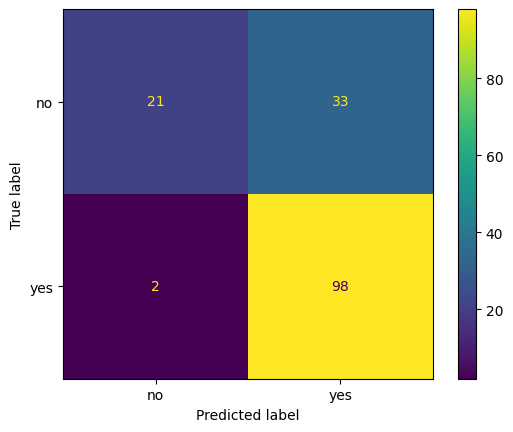

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['no', 'yes'])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [ ]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
ypred = rf.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
rf.predict_proba(xtest)

array([[0.23, 0.77],
       [0.23, 0.77],
       [0.26, 0.74],
       [0.46, 0.54],
       [0.14, 0.86],
       [0.12, 0.88],
       [0.02, 0.98],
       [0.34, 0.66],
       [0.26, 0.74],
       [0.37, 0.63],
       [0.68, 0.32],
       [0.09, 0.91],
       [0.37, 0.63],
       [0.25, 0.75],
       [0.09, 0.91],
       [0.14, 0.86],
       [0.38, 0.62],
       [0.18, 0.82],
       [0.15, 0.85],
       [0.26, 0.74],
       [0.25, 0.75],
       [0.14, 0.86],
       [0.61, 0.39],
       [0.09, 0.91],
       [0.14, 0.86],
       [0.44, 0.56],
       [0.21, 0.79],
       [0.22, 0.78],
       [0.11, 0.89],
       [0.31, 0.69],
       [0.26, 0.74],
       [0.11, 0.89],
       [0.08, 0.92],
       [0.12, 0.88],
       [0.46, 0.54],
       [0.73, 0.27],
       [0.18, 0.82],
       [0.09, 0.91],
       [0.06, 0.94],
       [0.26, 0.74],
       [0.07, 0.93],
       [0.14, 0.86],
       [0.27, 0.73],
       [0.03, 0.97],
       [0.18, 0.82],
       [0.11, 0.89],
       [0.16, 0.84],
       [0.8 ,

In [ ]:
accuracy_score(ytest, ypred)

0.7922077922077922

In [ ]:
confusion_matrix = confusion_matrix(ytest, ypred)

confusion_matrix

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['no', 'yes'])
cm_display.plot()
plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# # from catboost import CatBoostRegressor

# # Splitting
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # creating models
# models = [
#     ('Linear Regression', LinearRegression()),
#     ('Ridge Regression', Ridge()),
#     ('Lasso Regression', Lasso()),
#     ('ElasticNet Regression', ElasticNet()),
#     ('Decision Tree', DecisionTreeRegressor()),
#     ('Random Forest', RandomForestRegressor()),
#     ('Gradient Boosting', GradientBoostingRegressor()),
#     ('Support Vector Machine', SVR()),
#     ('K-Nearest Neighbors', KNeighborsRegressor()),
#     ('XGBoost', XGBRegressor()),
#     ('LightGBM', LGBMRegressor()),
#     # ('CatBoost', CatBoostRegressor(silent=True))
# ]

# # Initializing an empty list
# results_list = []

# # Evaluating each model
# for name, model in models:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)

#     results_list.append({'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})

# results = pd.DataFrame(results_list)

In [ ]:
# results

In [ ]:
# # Plotting
# import plotly.express as px
# fig = px.bar(results, x='Model', y=['MAE', 'MSE', 'RMSE', 'R2'], barmode='group',
#              title='Regression Model Performance Metrics',
#              labels={'value': 'Score', 'Model': 'Model'},
#              height=600)
# fig.update_layout(xaxis_title='Model', yaxis_title='Score', legend_title='Metrics')
# fig.show()

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.9 MB/s eta 0:00:00


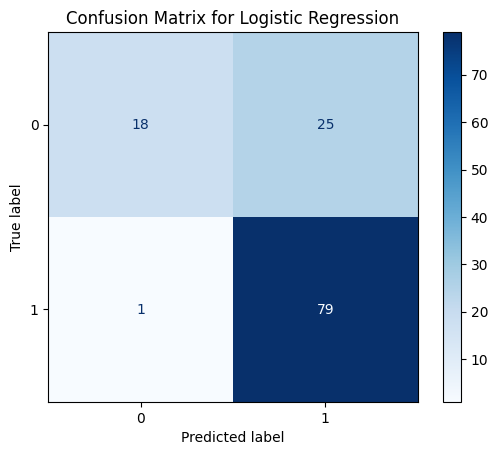

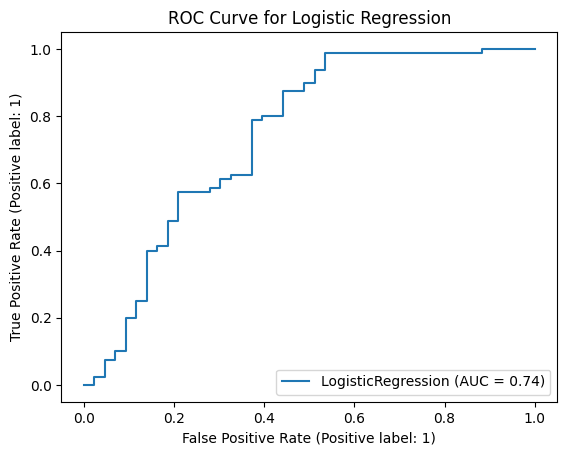

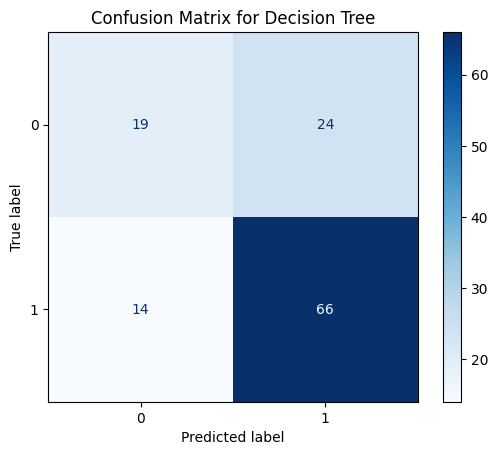

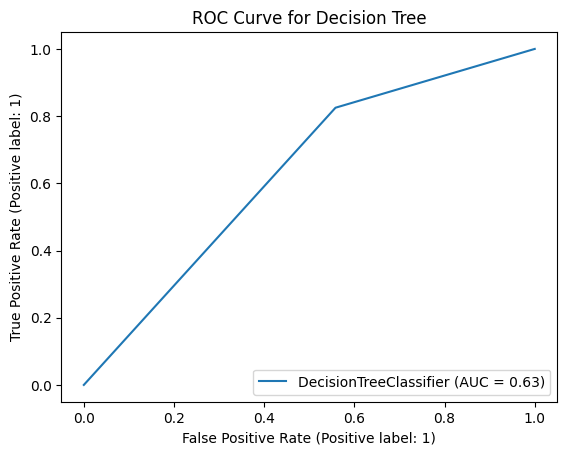

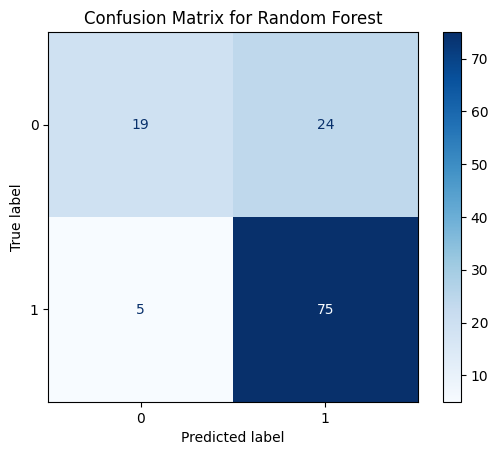

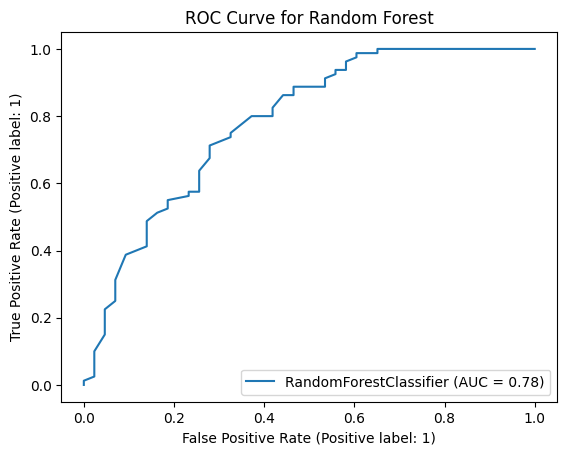

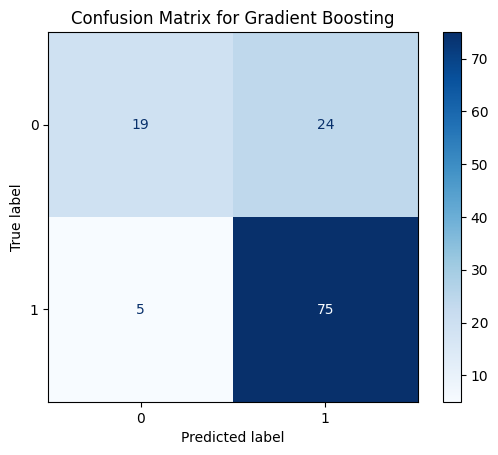

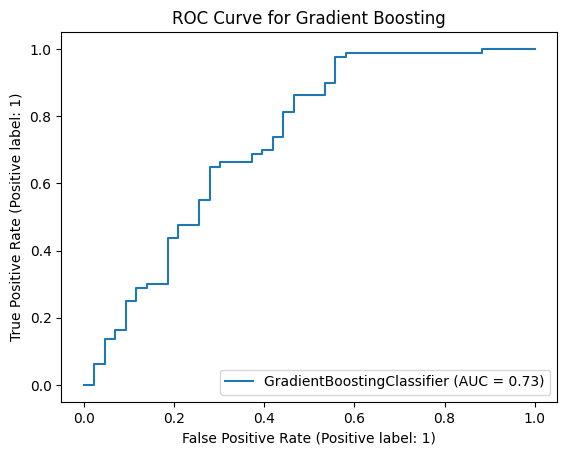

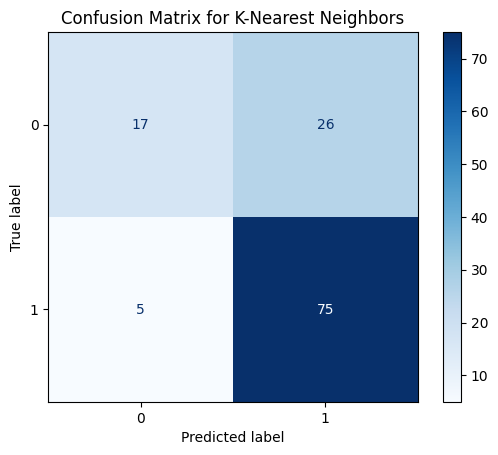

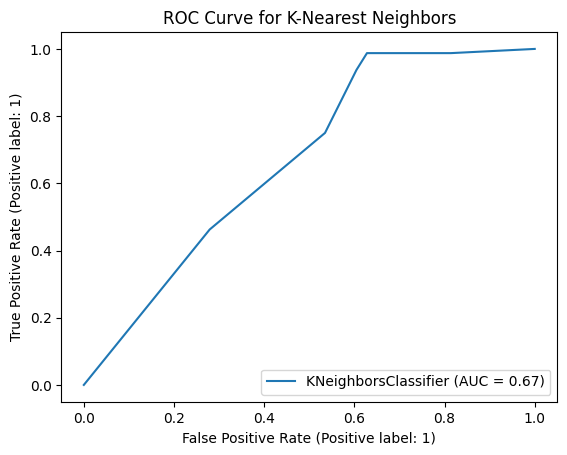

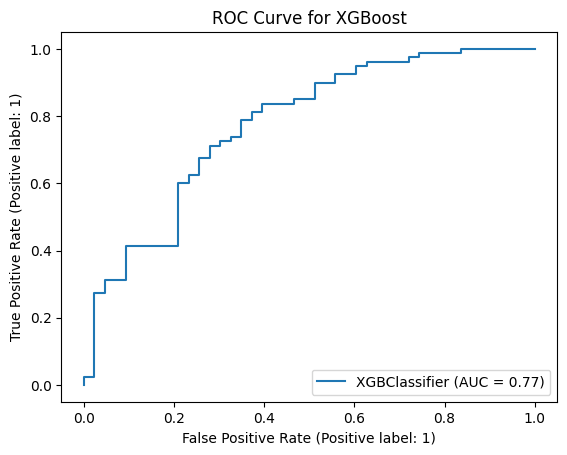

[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

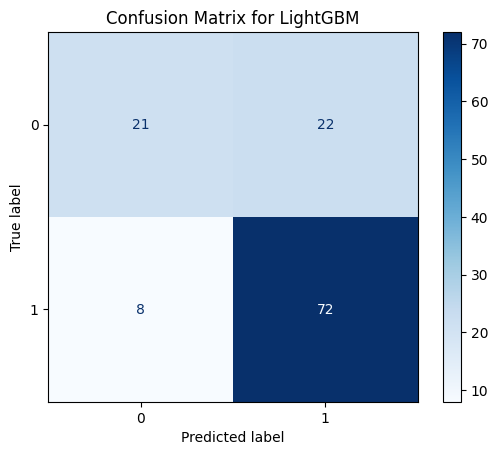

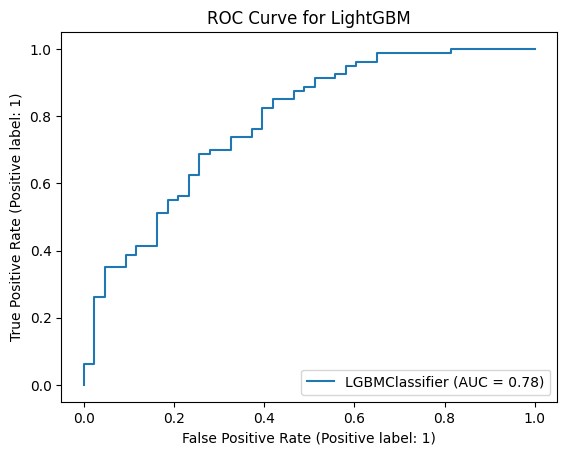

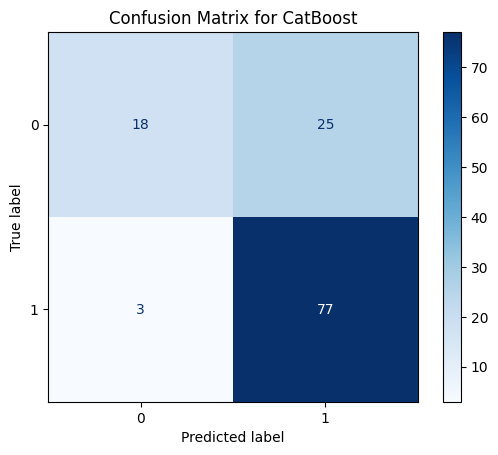

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, balanced_accuracy_score,
                             confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
import matplotlib.pyplot as plt


# Splitting
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining models
models = [
    ('Logistic Regression', LogisticRegression( random_state = 42)),
    ('Decision Tree', DecisionTreeClassifier(random_state = 42)),
    ('Random Forest', RandomForestClassifier(random_state = 42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state = 42)),
    ('Support Vector Machine', SVC(probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 5)),
    ('XGBoost', XGBClassifier(random_state = 42)),
    ('LightGBM', LGBMClassifier(random_state = 42)),
    # ('CatBoost', CatBoostClassifier(silent=True))
]

# Initializing an empty list
results_list = []

# Evaluation
for name, model in models:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    y_pred_proba = model.predict_proba(xtest)[:, 1]

    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    balanced_acc = balanced_accuracy_score(ytest, y_pred)
    roc_auc = roc_auc_score(ytest, y_pred_proba)
    conf_matrix = confusion_matrix(ytest, y_pred)

    results_list.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'Balanced Accuracy': balanced_acc, 'ROC-AUC': roc_auc})

    # Displaying the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Displaying the ROC curve using RocCurveDisplay
    RocCurveDisplay.from_estimator(model, xtest, ytest)
    plt.title(f'ROC Curve for {name}')
    plt.show()

results = pd.DataFrame(results_list)

In [ ]:
results

Model  Accuracy  Precision  Recall  Balanced Accuracy  \
0     Logistic Regression  0.788618   0.759615  0.9875           0.703052   
1           Decision Tree  0.691057   0.733333  0.8250           0.633430   
2           Random Forest  0.764228   0.757576  0.9375           0.689680   
3       Gradient Boosting  0.764228   0.757576  0.9375           0.689680   
4  Support Vector Machine  0.788618   0.759615  0.9875           0.703052   
5     K-Nearest Neighbors  0.747967   0.742574  0.9375           0.666424   
6                 XGBoost  0.747967   0.752577  0.9125           0.677180   
7                LightGBM  0.756098   0.765957  0.9000           0.694186   
8                CatBoost  0.772358   0.754902  0.9625           0.690552   

    ROC-AUC  
0  0.742151  
1  0.633430  
2  0.782849  
3  0.728198  
4  0.765698  
5  0.669477  
6  0.773256  
7  0.782267  
8  0.763953

In [ ]:
import pandas as pd
data=pd.read_csv("Mall_Customers (1).csv")

data=data.drop("CustomerID", axis=1)
data["Gender"]=data["Gender"].map({"Male":1, "Female":0})  #convert Gender values into numerical
data = data.head(15)

In [ ]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
agglomerative=pd.DataFrame(clust_labels, columns = ['cluster'])


In [ ]:
agglomerative['cluster'].value_counts()

cluster
1    5
0    3
2    3
3    2
4    2
Name: count, dtype: int64

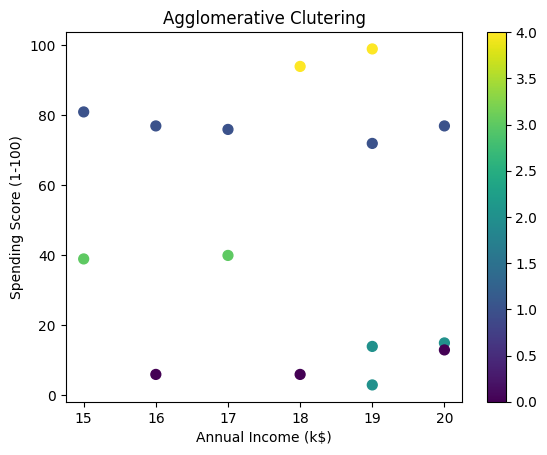

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['Annual Income (k$)'] , data ["Spending Score (1-100)"] , c= agglomerative['cluster'], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

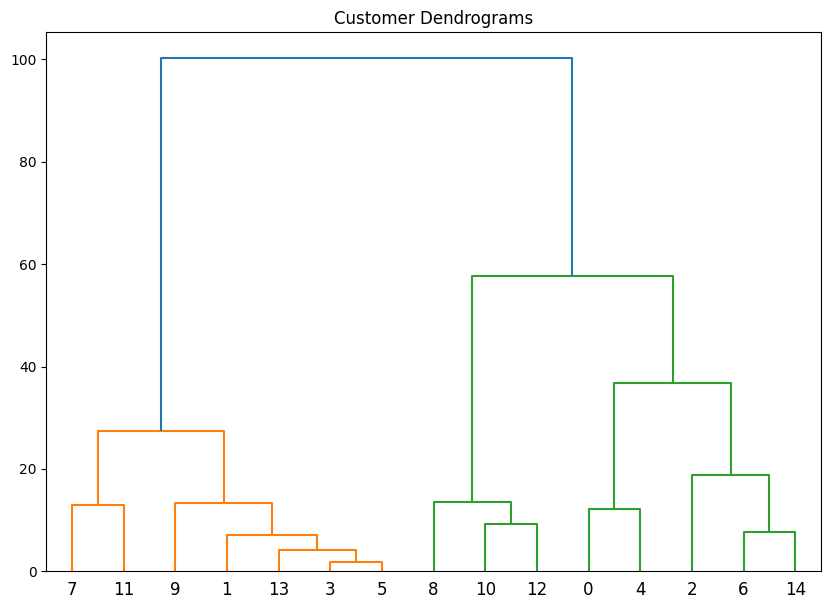

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [ ]:
shc.linkage(data, method="complete")

array([[  3.        ,   5.        ,   1.73205081,   2.        ],
       [ 13.        ,  15.        ,   4.12310563,   3.        ],
       [  1.        ,  16.        ,   7.14142843,   4.        ],
       [  6.        ,  14.        ,   7.61577311,   2.        ],
       [ 10.        ,  12.        ,   9.16515139,   2.        ],
       [  0.        ,   4.        ,  12.24744871,   2.        ],
       [  7.        ,  11.        ,  13.03840481,   2.        ],
       [  9.        ,  17.        ,  13.37908816,   5.        ],
       [  8.        ,  19.        ,  13.49073756,   3.        ],
       [  2.        ,  18.        ,  18.84144368,   3.        ],
       [ 21.        ,  22.        ,  27.45906044,   7.        ],
       [ 20.        ,  24.        ,  36.81032464,   5.        ],
       [ 23.        ,  26.        ,  57.76677246,   8.        ],
       [ 25.        ,  27.        , 100.28958072,  15.        ]])

In [ ]:
#Unsupervised learning problem

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_excel('/content/correct_Online Retail.xlsx')

In [ ]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom

In [ ]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
df['Description'].nunique()

4223

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df.shape

(541909, 8)

In [ ]:
df['Description'] = str(df['Description'])

In [ ]:
dle = LabelEncoder()
df['Description'] = dle.fit_transform(df['Description'])

In [ ]:
cle = LabelEncoder()
df['Country'] = cle.fit_transform(df['Country'])

In [ ]:
df.drop(columns=['StockCode','InvoiceNo','CustomerID'],inplace=True)

In [ ]:
df.head()

Description  Quantity         InvoiceDate  UnitPrice  Country
0            0         6 2010-12-01 08:26:00       2.55       36
1            0         6 2010-12-01 08:26:00       3.39       36
2            0         8 2010-12-01 08:26:00       2.75       36
3            0         6 2010-12-01 08:26:00       3.39       36
4            0         6 2010-12-01 08:26:00       3.39       36

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.head()

Description  Quantity         InvoiceDate  UnitPrice  Country
0            0         6 2010-12-01 08:26:00       2.55       36
1            0         6 2010-12-01 08:26:00       3.39       36
2            0         8 2010-12-01 08:26:00       2.75       36
3            0         6 2010-12-01 08:26:00       3.39       36
4            0         6 2010-12-01 08:26:00       3.39       36

In [ ]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

In [ ]:
df.head()

Description  Quantity         InvoiceDate  UnitPrice  Country  Year  Month  \
0            0         6 2010-12-01 08:26:00       2.55       36  2010     12   
1            0         6 2010-12-01 08:26:00       3.39       36  2010     12   
2            0         8 2010-12-01 08:26:00       2.75       36  2010     12   
3            0         6 2010-12-01 08:26:00       3.39       36  2010     12   
4            0         6 2010-12-01 08:26:00       3.39       36  2010     12   

   Day  
0    1  
1    1  
2    1  
3    1  
4    1

In [ ]:
df.drop('InvoiceDate',axis = 1, inplace = True)

In [ ]:
df.head()

Description  Quantity  UnitPrice  Country  Year  Month  Day
0            0         6       2.55       36  2010     12    1
1            0         6       3.39       36  2010     12    1
2            0         8       2.75       36  2010     12    1
3            0         6       3.39       36  2010     12    1
4            0         6       3.39       36  2010     12    1

In [ ]:
df['Country'].nunique()

38

In [ ]:
unsupervised_model = KMeans(n_clusters=10, random_state=42)

In [ ]:
clust_result = unsupervised_model.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
result=pd.DataFrame(clust_result, columns = ['clusters'])


In [ ]:
result.head()

clusters
0         0
1         0
2         0
3         0
4         0

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df['UnitPrice'] , df["Quantity"] , c= result['clusters'], s=50)
ax.set_title("Clutering")
ax.set_xlabel("UnitPrice")
ax.set_ylabel("Quantity")
plt.colorbar(scatter)

Text(0, 0.5, 'quantity')

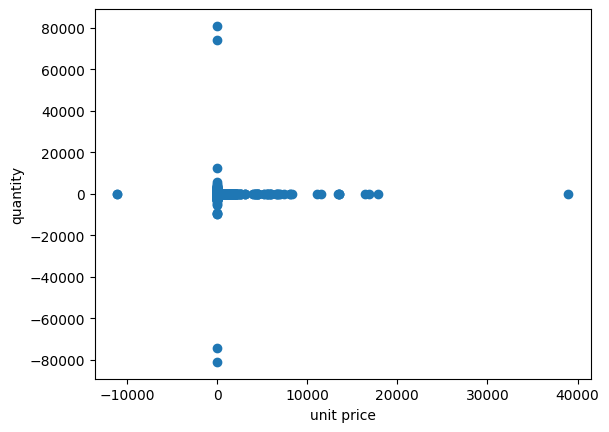

In [ ]:
plt.scatter(df['UnitPrice'],df['Quantity'])
plt.xlabel('unit price')
plt.ylabel('quantity')

In [ ]:
import plotly.express as px
px.scatter(df, x='UnitPrice', y='Quantity', color=result['clusters'], width = 800, height = 600)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(df,clust_result)

0.9661592917913983

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample dataset of transactions
data = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread','egg'],
    ['milk', 'butter','egg'],
    ['bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['bread','egg'],
    ['milk', 'bread'],
    ['bread', 'butter'],
    ['milk', 'bread', 'butter']
]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the dataset to a DataFrame
df = pd.DataFrame(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       1       2
0   milk   bread  butter
1  bread  butter    None
2   milk   bread     egg
3   milk  butter     egg
4  bread  butter    None

In [ ]:

# Initialize the TransactionEncoder
te = TransactionEncoder()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Fit and transform the data
te_ary = te.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
te.columns_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['bread', 'butter', 'egg', 'milk']

In [ ]:
# Convert the transformed data to a DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


bread  butter    egg   milk
0   True    True  False   True
1   True    True  False  False
2   True   False   True   True
3  False    True   True   True
4   True    True  False  False
5   True    True  False   True
6   True   False   True  False
7   True   False  False   True
8   True    True  False  False
9   True    True  False   True

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support         itemsets
0      0.9          (bread)
1      0.7         (butter)
2      0.6           (milk)
3      0.6  (bread, butter)
4      0.5    (bread, milk)

In [ ]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents consequents  antecedent support  consequent support  support  \
0     (bread)    (butter)                 0.9                 0.7      0.6   
1    (butter)     (bread)                 0.7                 0.9      0.6   
2     (bread)      (milk)                 0.9                 0.6      0.5   
3      (milk)     (bread)                 0.6                 0.9      0.5   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.666667  0.952381     -0.03         0.9      -0.333333  
1    0.857143  0.952381     -0.03         0.7      -0.142857  
2    0.555556  0.925926     -0.04         0.9      -0.444444  
3    0.833333  0.925926     -0.04         0.6      -0.166667

In [ ]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets,metric="lift",min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Number of rows in the dataset
num_rows = 10000

# Generate random data for each column
np.random.seed(42)  # For reproducibility

# Dates between January 1, 2019 and December 31, 2023
start_date = datetime(2019, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_rows)]

transaction_types = ['purchase', 'sale', 'dividend', 'interest', 'fee']
transaction_type = [random.choice(transaction_types) for _ in range(num_rows)]

categories = ['stocks', 'bonds', 'commodities', 'cryptocurrency', 'real estate']
category = [random.choice(categories) for _ in range(num_rows)]

amounts = np.random.normal(5000, 2500, num_rows)  # Normally distributed amounts
amounts = np.abs(amounts.round(2))

currencies = ['USD', 'EUR', 'GBP', 'JPY']
currency = [random.choice(currencies) for _ in range(num_rows)]

countries = ['USA', 'UK', 'Germany', 'Japan', 'Canada']
country = [random.choice(countries) for _ in range(num_rows)]

sectors = ['technology', 'finance', 'healthcare', 'energy', 'consumer goods']
sector = [random.choice(sectors) for _ in range(num_rows)]

risk_levels = ['low', 'medium', 'high']
risk_level = [random.choice(risk_levels) for _ in range(num_rows)]

return_percentages = np.random.normal(5, 2, num_rows)  # Normally distributed return percentages
return_percentages = return_percentages.round(2)

investor_types = ['individual', 'institutional']
investor_type = [random.choice(investor_types) for _ in range(num_rows)]

brokers = ['Broker A', 'Broker B', 'Broker C', 'Broker D', 'Broker E']
broker = [random.choice(brokers) for _ in range(num_rows)]

durations = np.random.randint(1, 10, num_rows)  # Random integers for durations
instrument_types = ['stock', 'bond', 'ETF', 'mutual fund']
instrument_type = [random.choice(instrument_types) for _ in range(num_rows)]

regions = ['North America', 'Europe', 'Asia', 'South America', 'Africa']
region = [random.choice(regions) for _ in range(num_rows)]

dividend_types = ['ordinary', 'special']
dividend_type = [random.choice(dividend_types) if random.random() < 0.2 else None for _ in range(num_rows)]

# Create a DataFrame
data = {
    'Date': date_range,
    'Transaction_Type': transaction_type,
    'Category': category,
    'Amount': amounts,
    'Currency': currency,
    'Country': country,
    'Sector': sector,
    'Risk_Level': risk_level,
    'Return_Percentage': return_percentages,
    'Investor_Type': investor_type,
    'Broker': broker,
    'Duration': durations,
    'Instrument_Type': instrument_type,
    'Region': region,
    'Dividend_Type': dividend_type
}

df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())


        Date Transaction_Type        Category   Amount Currency  Country  \
0 2019-10-15             sale  cryptocurrency  6241.79      EUR   Canada   
1 2023-08-08              fee          stocks  4654.34      JPY   Canada   
2 2019-04-28             sale     commodities  6619.22      JPY  Germany   
3 2023-10-01         interest  cryptocurrency  8807.57      EUR  Germany   
4 2019-09-19         interest          stocks  4414.62      EUR  Germany   

       Sector Risk_Level  Return_Percentage  Investor_Type    Broker  \
0  healthcare       high               3.64     individual  Broker D   
1      energy        low               4.39     individual  Broker E   
2  technology        low               3.81  institutional  Broker C   
3     finance       high               5.22     individual  Broker B   
4      energy       high               7.39     individual  Broker E   

   Duration Instrument_Type         Region Dividend_Type  
0         1           stock  North America         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date Transaction_Type        Category   Amount Currency  Country  \
0    2019-10-15             sale  cryptocurrency  6241.79      EUR   Canada   
1    2023-08-08              fee          stocks  4654.34      JPY   Canada   
2    2019-04-28             sale     commodities  6619.22      JPY  Germany   
3    2023-10-01         interest  cryptocurrency  8807.57      EUR  Germany   
4    2019-09-19         interest          stocks  4414.62      EUR  Germany   
...         ...              ...             ...      ...      ...      ...   
9995 2021-11-29         purchase  cryptocurrency  8252.76      EUR  Germany   
9996 2019-02-06         interest  cryptocurrency     4.14      EUR  Germany   
9997 2023-06-29         dividend  cryptocurrency  3236.71      EUR       UK   
9998 2022-04-05              fee     commodities  6239.41      GBP  Germany   
9999 2021-04-26         purchase           bonds  6610.97      GBP  Germany   

              Sector Risk_Level  Return_Percentage  Investor_Type    Broker  \
0         healthcare       high               3.64     individual  Broker D   
1             energy        low               4.39     individual  Broker E   
2         technology        low               3.81  institutional  Broker C   
3            finance       high               5.22     individual  Broker B   
4             energy       high               7.39     individual  Broker E   
...              ...        ...                ...            ...       ...   
9995         finance       high               5.78  institutional  Broker D   
9996         finance        low               7.75  institutional  Broker B   
9997          energy        low               5.76     individual  Broker D   
9998          energy     medium               8.43  institutional  Broker E   
9999  consumer goods        low               1.76  institutional  Broker A   

      Duration Instrument_Type         Region Dividend_Type  
0            1           stock  North America          None  
1            2            bond         Europe          None  
2            9             ETF  South America          None  
3            4             ETF  South America          None  
4            3            bond         Africa       special  
...        ...             ...            ...           ...  
9995         1           stock         Africa          None  
9996         9             ETF         Africa      ordinary  
9997         7           stock           Asia          None  
9998         8     mutual fund         Europe          None  
9999         7           stock         Europe       special  

[10000 rows x 15 columns]

In [ ]:
import pandas as pd
import numpy as np
import scipy

In [ ]:
df = pd.DataFrame({'age':[12,14,14,12,13,90000,11], 'salary':[100000,150,200,300,170,200,200]})

In [ ]:
df

age  salary
0     12  100000
1     14     150
2     14     200
3     12     300
4     13     170
5  90000     200
6     11     200

In [ ]:
from scipy.stats import zscore

In [ ]:
zscore(df).describe()

age    salary
count  7.000000  7.000000
mean   0.000000  0.000000
std    1.080123  1.080123
min   -0.408301 -0.409775
25%   -0.408269 -0.408773
50%   -0.408238 -0.408343
75%   -0.408206 -0.406912
max    2.449490  2.449488

In [ ]:
a = df[np.abs(zscore(df)) < 1]
a

age  salary
0  12.0     NaN
1  14.0   150.0
2  14.0   200.0
3  12.0   300.0
4  13.0   170.0
5   NaN   200.0
6  11.0   200.0

In [ ]:
a.fillna(a.mean())

age      salary
0  12.000000  203.333333
1  14.000000  150.000000
2  14.000000  200.000000
3  12.000000  300.000000
4  13.000000  170.000000
5  12.666667  200.000000
6  11.000000  200.000000

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(df, x = 'age',y='salary',width = 1000)

In [ ]:
df['age'] = df[df['age'] <= 100]['age']

In [ ]:
df

age  salary
0  12.0  100000
1  14.0     150
2  14.0     200
3  12.0     300
4  13.0     170
5   NaN     200
6  11.0     200

In [ ]:
px.box(df, y = 'age',width = 1000)

In [ ]:
px.box(df, y = 'salary',width = 1000)

In [ ]:
#Deep learning with loan data

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  turn_over  loan_amount_day  \
0              2            1   0.038306         0.986301   
1              0            0   0.027929         0.986301   
2              2            1   0.022000         0.986301   
3              2            1   0.046458         0.986301   
4              2            1   0.023500         0.986301   

   applicant_difference  
0                5849.0  
1                3075.0  
2                3000.0  
3                 225.0  
4                6000.0

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xtrain.shape

(491, 14)

In [ ]:
model  = Sequential()
model.add(Dense(16, input_dim = 14, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
callback = EarlyStopping(monitor='val_accuracy', patience=10)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.01),
              metrics = ['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, epochs = 200, batch_size = 32,verbose = True,
          validation_data = (xtest, ytest),callbacks = [callback])

Epoch 1/200
16/16 [==============================] - 2s 17ms/step - loss: 0.6483 - accuracy: 0.6538 - val_loss: 0.6434 - val_accuracy: 0.6504
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6121 - accuracy: 0.6965 - val_loss: 0.6206 - val_accuracy: 0.6504
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6130 - accuracy: 0.6965 - val_loss: 0.6151 - val_accuracy: 0.6504
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 0.6965 - val_loss: 0.6036 - val_accuracy: 0.6504
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5707 - accuracy: 0.6965 - val_loss: 0.5970 - val_accuracy: 0.6504
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5575 - accuracy: 0.7128 - val_loss: 0.5805 - val_accuracy: 0.7886
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5207 - accuracy: 0.7902 - val_loss: 0.5658 - val_accuracy: 0.7642
Epoch 8/200


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 16)                240       
                                                                 
 dense_43 (Dense)            (None, 32)                544       
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_44 (Dense)            (None, 64)                2112      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_45 (Dense)            (None, 64)                4160      
                                                                 
 dropout_17 (Dropout)        (None, 64)               

In [ ]:
model.save('loan_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.evaluate(xtest, ytest)

4/4 [==============================] - 0s 5ms/step - loss: 0.5062 - accuracy: 0.7886


[0.5061646103858948, 0.7886179089546204]

In [ ]:
ypred = model.predict(xtest)

4/4 [==============================] - 0s 6ms/step


In [ ]:
ypred

array([[0.7819185 ],
       [0.7608203 ],
       [0.7947799 ],
       [0.760612  ],
       [0.75656015],
       [0.7733239 ],
       [0.8393294 ],
       [0.8463951 ],
       [0.76626104],
       [0.8435492 ],
       [0.12427349],
       [0.75301075],
       [0.8083779 ],
       [0.7612358 ],
       [0.8739317 ],
       [0.7911224 ],
       [0.78401613],
       [0.74551713],
       [0.80659556],
       [0.8017612 ],
       [0.81961507],
       [0.81360495],
       [0.78895825],
       [0.80347055],
       [0.8526392 ],
       [0.7219841 ],
       [0.7466067 ],
       [0.75217736],
       [0.8066003 ],
       [0.8417442 ],
       [0.8741912 ],
       [0.8450565 ],
       [0.7700892 ],
       [0.7729945 ],
       [0.7468578 ],
       [0.11477899],
       [0.8112685 ],
       [0.8837785 ],
       [0.83999586],
       [0.8981979 ],
       [0.7769677 ],
       [0.800232  ],
       [0.7843417 ],
       [0.7587428 ],
       [0.7773784 ],
       [0.7922687 ],
       [0.79465675],
       [0.112

In [ ]:
for i in range(len(ypred)):
    if ypred[i] > 0.5:
        ypred[i] = 1
    else:
        ypred[i] = 0

In [ ]:
ypred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

In [ ]:
accuracy_score(np.array(ytest), ypred)

0.7886178861788617

In [ ]:
# [stemmer.stem(word) for word in words]

In [ ]:
# for word in words:
#     word = stemmer.stem(word)